In [1]:
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [4]:
df['Sex_binary'] = np.where(df['Sex'] == "female", 1, 0)
df.drop(columns='Sex', inplace=True)

In [5]:
# set Embarked_ternary to 1 for C, 2 for Q, 3 for S
df['Embarked_ternary'] = np.where(df["Embarked"] == "C", 1, 
         (np.where(df["Embarked"] == "Q", 2, 3)))

In [6]:
count_nan = len(df['Cabin']) - df['Cabin'].count()

In [7]:
count_nan

687

OK, so most of the Cabin values are NaN, so we can probably drop this column.

In [8]:
df.drop(columns='Cabin', inplace=True)

Not sure about name column, might be useful data in len(name)?

In [9]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_binary,Embarked_ternary
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,3
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,3
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,Q,0,2
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,S,0,3
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,S,0,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,S,1,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,C,1,1


In [10]:
# Slightly more likely to survive if younger
df.groupby(['Survived']).Age.mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [11]:
df.groupby(['Survived']).Fare.mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [12]:
# who embarked at Cherbourg?
print("number embarked at Cherbourg", len(df.loc[df['Embarked_ternary'] == 1]))

print("average survival status", df.loc[df['Embarked_ternary'] == 1].Survived.mean())


number embarked at Cherbourg 168
average survival status 0.5535714285714286


In [13]:
# who embarked at Queenstown?

print("number embarked at Queenstown", len(df.loc[df['Embarked_ternary'] == 2]))

print("average survival status", df.loc[df['Embarked_ternary'] == 2].Survived.mean())


number embarked at Queenstown 77
average survival status 0.38961038961038963


In [14]:
# who embarked at Southampton?
print("number embarked at Southampton", len(df.loc[df['Embarked_ternary'] == 3]))

print("average survival status", df.loc[df['Embarked_ternary'] == 3].Survived.mean())

number embarked at Southampton 646
average survival status 0.33900928792569657


OK, so there is some evidence that embarking at Cherbourg is correlated with survival. So let's turn embarkation_ternary into a binary condition: emarbarked_at_cherbourg

In [15]:
df['Embarked_at_cherbourg'] = np.where(df['Embarked_ternary'] == 1, 1, 0)

In [16]:
df.dtypes

PassengerId                int64
Survived                   int64
Pclass                     int64
Name                      object
Age                      float64
SibSp                      int64
Parch                      int64
Ticket                    object
Fare                     float64
Embarked                  object
Sex_binary                 int64
Embarked_ternary           int64
Embarked_at_cherbourg      int64
dtype: object

In [17]:
df.drop(columns="Embarked_ternary", inplace=True)

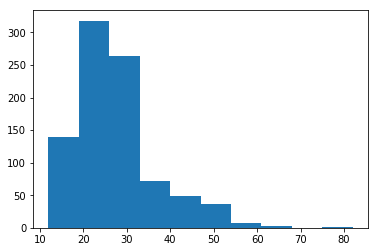

In [18]:
# how do the name lengths vary? And are they correlated with survival?

names_lens = [(name[1], len(name[1])) for name in df["Name"].iteritems()]
name_lens = [name_len[1] for name_len in names_lens]
plt.hist(name_lens)
plt.show()

In [19]:
# add an int value for name length
df['Name_len'] = [len(name[1]) for name in df["Name"].iteritems()]

In [20]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_binary,Embarked_at_cherbourg,Name_len
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939,-0.001205,-0.012986
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,0.168240,0.332350
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,-0.243292,-0.220001
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.036261,0.034612
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,-0.059528,0.165019
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,-0.011069,0.252282
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,0.269335,0.155832
Sex_binary,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,0.082853,0.448759
Embarked_at_cherbourg,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,0.082853,1.000000,0.027481
Name_len,-0.012986,0.332350,-0.220001,0.034612,0.165019,0.252282,0.155832,0.448759,0.027481,1.000000


In [21]:
# woah, having a long name is almost as highly correlated with survival as passanger class!

In [22]:
# todo: engineer ticket class
# for now, we'll just drop it

df.drop(columns=['PassengerId', 'Embarked', 'Name', 'Ticket'], inplace=True)

In [23]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_binary,Embarked_at_cherbourg,Name_len
0,0,3,22.0,1,0,7.2500,0,0,23
1,1,1,38.0,1,0,71.2833,1,1,51
2,1,3,26.0,0,0,7.9250,1,0,22
3,1,1,35.0,1,0,53.1000,1,0,44
4,0,3,35.0,0,0,8.0500,0,0,24


In [24]:
df.dtypes

Survived                   int64
Pclass                     int64
Age                      float64
SibSp                      int64
Parch                      int64
Fare                     float64
Sex_binary                 int64
Embarked_at_cherbourg      int64
Name_len                   int64
dtype: object

In [25]:
df.isnull().any()

Survived                 False
Pclass                   False
Age                       True
SibSp                    False
Parch                    False
Fare                     False
Sex_binary               False
Embarked_at_cherbourg    False
Name_len                 False
dtype: bool

We have some null ages. Let's see how many.

In [26]:
len(df.loc[df.Age.isnull()])

177

And how are they distributed?

In [27]:
# naively fill nulls for now
df.fillna(df.mean(), inplace=True)

Scale data


In [28]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_binary,Embarked_at_cherbourg,Name_len
0,0,3,22.000000,1,0,7.2500,0,0,23
1,1,1,38.000000,1,0,71.2833,1,1,51
2,1,3,26.000000,0,0,7.9250,1,0,22
3,1,1,35.000000,1,0,53.1000,1,0,44
4,0,3,35.000000,0,0,8.0500,0,0,24
5,0,3,29.699118,0,0,8.4583,0,0,16
6,0,1,54.000000,0,0,51.8625,0,0,23
7,0,3,2.000000,3,1,21.0750,0,0,30
8,1,3,27.000000,0,2,11.1333,1,0,49
9,1,2,14.000000,1,0,30.0708,1,1,35


In [29]:
(train_passengers, train_labels) = (df.drop('Survived', axis=1), df['Survived'])

In [30]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_binary,Embarked_at_cherbourg,Name_len
0,0,3,22.000000,1,0,7.2500,0,0,23
1,1,1,38.000000,1,0,71.2833,1,1,51
2,1,3,26.000000,0,0,7.9250,1,0,22
3,1,1,35.000000,1,0,53.1000,1,0,44
4,0,3,35.000000,0,0,8.0500,0,0,24
5,0,3,29.699118,0,0,8.4583,0,0,16
6,0,1,54.000000,0,0,51.8625,0,0,23
7,0,3,2.000000,3,1,21.0750,0,0,30
8,1,3,27.000000,0,2,11.1333,1,0,49
9,1,2,14.000000,1,0,30.0708,1,1,35


In [31]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(train_passengers)
scaler.transform(train_passengers, copy=False)

array([[ 0.82737724, -0.5924806 ,  0.43279337, ..., -0.73769513,
        -0.48204268, -0.42745127],
       [-1.56610693,  0.63878901,  0.43279337, ...,  1.35557354,
         2.0745051 ,  2.59096206],
       [ 0.82737724, -0.2846632 , -0.4745452 , ...,  1.35557354,
        -0.48204268, -0.53525175],
       ...,
       [ 0.82737724,  0.        ,  0.43279337, ...,  1.35557354,
        -0.48204268,  1.40515682],
       [-1.56610693, -0.2846632 , -0.4745452 , ..., -0.73769513,
         2.0745051 , -0.64305222],
       [ 0.82737724,  0.17706291, -0.4745452 , ..., -0.73769513,
        -0.48204268, -0.85865317]])

In [32]:
# train_passengers is df
train_passengers[train_passengers.columns] = scaler.fit_transform(train_passengers[train_passengers.columns])

In [33]:
# make a function with preceding data-wrangling steps, so that we can perform the same operations on the test set
def wrangle(df):
    """
    takes a df with same format as training set.
    returns df in same format as modified training set
    """
    df['Sex_binary'] = np.where(df['Sex'] == "female", 1, 0)
    df.drop(columns='Sex', inplace=True)
    df['Embarked_ternary'] = np.where(df["Embarked"] == "C", 1, 
         (np.where(df["Embarked"] == "Q", 2, 3)))
    df.drop(columns='Cabin', inplace=True)
    df['Embarked_at_cherbourg'] = np.where(df['Embarked_ternary'] == 1, 1, 0)
    df.drop(columns="Embarked_ternary", inplace=True)
    names_lens = [(name[1], len(name[1])) for name in df["Name"].iteritems()]
    name_lens = [name_len[1] for name_len in names_lens]
    df['Name_len'] = [len(name[1]) for name in df["Name"].iteritems()]    
    df.drop(columns=['PassengerId', 'Embarked', 'Name', 'Ticket'], inplace=True)
    
    # naively fill in nulls for now
    df.fillna(df.mean(), inplace=True)
    return df

In [34]:
# load and transform test data
df_test = pd.read_csv("test.csv")
df_test = wrangle(df_test)

In [41]:
import keras
from keras import models 
from keras import layers
from keras import regularizers

from hyperopt import Trials, STATUS_OK, tpe
from keras.utils import np_utils

from hyperas import optim
from hyperas.distributions import choice, uniform

In [36]:
test_passengers = df_test

In [37]:
test_passengers[test_passengers.columns] = scaler.fit_transform(test_passengers[test_passengers.columns])

In [39]:
train_passengers.shape

(891, 8)

In [49]:
# https://github.com/maxpumperla/hyperas

def create_model(x_train, y_train, x_test, y_test):
    """
    Model providing function:

    Create Keras model with double curly brackets dropped-in as needed.
    Return value has to be a valid python dictionary with two customary keys:
        - loss: Specify a numeric evaluation metric to be minimized
        - status: Just use STATUS_OK and see hyperopt documentation if not feasible
    The last one is optional, though recommended, namely:
        - model: specify the model just created so that we can later use it again.
    """


    network = models.Sequential()
    network.add(layers.Dense(714, activation='relu', input_shape=(8,))) # experiment with different activation functions

    keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
    network.add(layers.Dense(714, activation='relu', activity_regularizer=regularizers.l1(0.01) )) # experiment with different activation functions
    network.add(layers.Dense(714, activation='relu')) # experiment with different activation functions

    network.add(layers.Dropout(0.5))

    network.add(layers.Dense(2, activation='softmax'))
    
    network.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy', 'categorical_accuracy'])
    result = network.fit(train_passengers, train_labels, epochs=100, batch_size={{choice([64, 128])}}, validation_split=0.1)
    
    #get the highest validation accuracy of the training epochs
    validation_acc = np.amax(result.history['val_acc']) 
    print('Best validation acc of epoch:', validation_acc)
    return {'loss': -validation_acc, 'status': STATUS_OK, 'model': network}


In [44]:
# network.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy', 'categorical_accuracy'])

In [45]:
# network.fit(train_passengers, train_labels, epochs=100, batch_size=8)


In [48]:
def data():
    """
    Data providing function:

    This function is separated from create_model() so that hyperopt
    won't reload data for each evaluation run.
    """
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(60000, 784)
    x_test = x_test.reshape(10000, 784)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    nb_classes = 10
    y_train = np_utils.to_categorical(y_train, nb_classes)
    y_test = np_utils.to_categorical(y_test, nb_classes)
    return train_passengers, train_labels, test_passengers


In [51]:
if __name__ == '__main__':
    best_run, best_model = optim.minimize(model=create_model,
                                          data=data,
                                          algo=tpe.suggest,
                                          max_evals=5,
                                          trials=Trials())
    X_train, Y_train, X_test, Y_test = data()
    print("Evalutation of best performing model:")
    print(best_model.evaluate(X_test, Y_test))
    print("Best performing model chosen hyper-parameters:")
    print(best_run)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kate/repos/kaggle/all/<ipython-input-51-b978c4c90872>'

In [ ]:
results = network.predict(test_passengers)

In [ ]:
results.shape

In [ ]:
survived = []
for result in results:
    survived.append(result[1])
  

plt.scatter(survived, range(len(survived)))
plt.show()


In [ ]:
# we need binary survival prediction, not a probability
binary_results = network.predict_classes(test_passengers)

In [ ]:
df_test = pd.read_csv("test.csv") # get unwrangled version of test set with the passenger IDs

In [ ]:
df_test['Survived'] = binary_results


In [ ]:
df_test.drop(columns=['Pclass', 'Embarked', 'Name', 'Ticket', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Fare', 'Embarked'], inplace=True)
    

In [ ]:
df_test.to_csv("predictions.csv", columns = ['PassengerId', 'Survived'])

In [ ]:
df_test.reset_index(drop=True, inplace=True)



In [ ]:
df_test

### TODO
get validation set
get sucess of model on train and validation set with plot, to make sure not overfitting

make a load of synthetic features, like 'is female and lower class'

rescale data

use hyperparam grid search

regularise model

logisitc regression? SVM

cross_validate